In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import cv2

Using TensorFlow backend.


In [2]:
import sys
import tensorflow as tf
import numpy as np
import os

In [3]:
batch_size = 48
num_classes = 7
epochs = 20

In [4]:
img_rows, img_cols = 128,128

In [5]:
arr = os.listdir('train')

In [6]:
arr1 = os.listdir('test')

In [7]:
y = []
x = []
y1 = []
x1 = []

In [8]:
for i in range(len(arr)):
    im = os.listdir('train/{}'.format(arr[i]))
    for j in im:
        k1 = 'train/' + arr[i] +"/" + j
        test4 = cv2.imread((k1))
        img1 = cv2.resize(test4, (128, 128))
        x.append(img1)
        y.append(arr[i])

In [10]:
for i in range(len(arr1)):
    im = os.listdir('test/{}'.format(arr1[i]))
    for j in im:
        k1 = 'test/' + arr1[i] + "/" + j
        test4 = cv2.imread((k1))
        img1 = cv2.resize(test4, (128, 128))
        x1.append(img1)
        y1.append(arr1[i])

In [11]:
y2 = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
y_train = []
y_test = []
for i in y:
    if i == 'angry':
        y_train.append(0)
    elif i == 'disgust':
        y_train.append(1)
    elif i == 'fear':
        y_train.append(2)
    elif i == 'happy':
        y_train.append(3)
    elif i == 'neutral':
        y_train.append(4)
    elif i == 'sad':
        y_train.append(5)
    elif i == 'surprise':
        y_train.append(6)
        
for i in y1:
    if i == 'angry':
        y_test.append(0)
    elif i == 'disgust':
        y_test.append(1)
    elif i == 'fear':
        y_test.append(2)
    elif i == 'happy':
        y_test.append(3)
    elif i == 'neutral':
        y_test.append(4)
    elif i == 'sad':
        y_test.append(5)
    elif i == 'surprise':
        y_test.append(6)

In [12]:
x_train = np.asarray(x, dtype="int32" )
x_train.shape

(24336, 128, 128, 3)

In [13]:
x_test = np.asarray( x1, dtype="int32" )
x_test.shape

(3479, 128, 128, 3)

Digit Image - 0


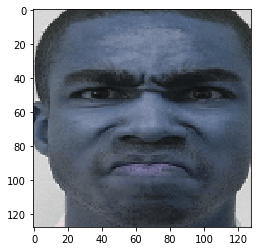

In [14]:
print('Digit Image - {}'.format(y_train[5]))
plt.imshow(x[90])
plt.show()

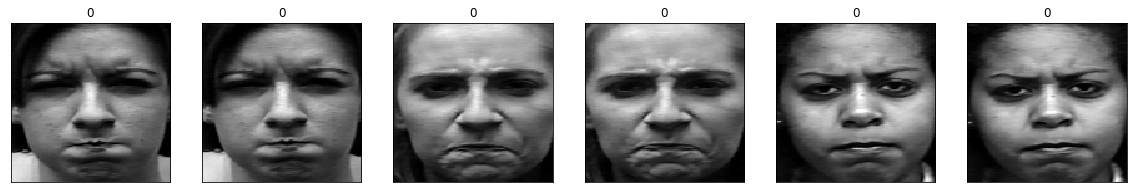

In [15]:
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(x_train[i])
    ax.set_title(str(y_train[i]))

In [16]:
K.image_data_format()

'channels_last'

In [17]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [18]:
input_shape = (img_rows, img_cols, 3)

In [19]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (24336, 128, 128, 3)
24336 train samples
3479 test samples


In [20]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [21]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [22]:
#1st convolution layer
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))
model.add(Dropout(0.5))

#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2, 2)))

model.add(Flatten())

#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))


In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 124, 124, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 58, 58, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 64)        0         
________

In [24]:
# evaluate test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)







Test accuracy: 35.0963%


In [25]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 24336 samples, validate on 3479 samples
Epoch 1/20
24336/24336 [==============================] - 159s 7ms/step - loss: 1.6192 - acc: 0.3634 - val_loss: 1.4372 - val_acc: 0.5070
Epoch 2/20
24336/24336 [==============================] - 189s 8ms/step - loss: 1.2282 - acc: 0.5683 - val_loss: 0.9761 - val_acc: 0.6522
Epoch 3/20
24336/24336 [==============================] - 187s 8ms/step - loss: 0.8876 - acc: 0.6834 - val_loss: 0.7498 - val_acc: 0.7269
Epoch 4/20
24336/24336 [==============================] - 185s 8ms/step - loss: 0.7095 - acc: 0.7478 - val_loss: 0.6803 - val_acc: 0.7545
Epoch 5/20
24336/24336 [==============================] - 179s 7ms/step - loss: 0.5783 - acc: 0.7928 - val_loss: 0.6480 - val_acc: 0.7715
Epoch 6/20
24336/24336 [==============================] - 218s 9ms/step - loss: 0.4509 - acc: 0.8401 - val_loss: 0.6622 - val_acc: 0.7893
Epoch 7/20
24336/24336 [===

In [26]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.4245356177331863
Test accuracy: 0.8100028743377942


In [27]:
model.save('Emotion_Recognition.txt')

In [28]:
model.load_weights('Emotion_Recognition.h5')

In [29]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
camera = cv2.VideoCapture(0)
while 1:
    return_value, image = camera.read()
    img2 = cv2.resize(image, (1080, 780))
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    for (x,y,w,h) in faces: 
        cv2.rectangle(img2,(x,y),(x+w,y+h),(255,255,0),2)  
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img2[y:y+h, x:x+w]
        img1 = cv2.resize(roi_color, (128, 128))
        x1 = img1.reshape(1, img_rows, img_cols, 3)
        x1 = x1.astype('float32')
        x1 /= 255
        #for i in range(0,1):
            #cv2.imwrite('opencv'+str(i)+'.png', image)
        predicted1 = model.predict_proba(x1)
        predicted2 = model.predict_classes(x1)
        m2 = predicted1.max()
        font = cv2.FONT_HERSHEY_SIMPLEX
        font= cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (x+200,y+100)
        bottomLeftCornerOfText1 = (10,580)
        bottomLeftCornerOfText2 = (50,120)
        fontScale  = 1
        fontColor  = (250,250,250)
        lineType   = 2

        if m2 >= 0.95:
            cv2.putText(img2,str(y2[predicted2[0]]), bottomLeftCornerOfText, font, fontScale,fontColor,lineType)
            cv2.putText(img2,str(m2), bottomLeftCornerOfText1, font, fontScale,fontColor,lineType)
    cv2.imshow('img',img2)
    cv2.imshow('img2',img1)
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
camera.release() 

cv2.destroyAllWindows()